In [2]:
#%matplotlib qt
import copy 
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import scipy.spatial
from PIL import Image
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import math
import random

In [3]:
def LoadData(dpath='English Alphabet'):
    images = []
    image_labels = []
    
    dirs = os.listdir(dpath)    
    c = len(dirs)
    
    for _dir in dirs:
        for file in glob.glob('English Alphabet\\' + _dir + '\\*.png'):
            images.append(np.ravel(np.array(  Image.open(file).convert('L')  )).astype(int))
            image_labels.append(int(_dir))
            
    images = np.array(images)
    image_labels = np.array(image_labels)
    
    #print(images)    
    #print(image_labels)
    #print(c)
    print(str(len(images)) + ' Images Loaded From ' + str(c) + ' Classes' )
    return images, image_labels, c

In [4]:
def to_bipolar(data):
    x = copy.deepcopy(data)
    
#     for i in range(0, x.shape[0]):
#         for j in range(0, x.shape[1]):
#             if x[i, j] == 255:
#                 x[i, j] = +1
#             else:
#                 x[i, j] = -1
    
    x = np.where(data == 255, +1, -1)
    
    print(str(x.shape[0]) + ' Images Converted To Bipolar' )
    return x

In [5]:
def split(x, y, testsize):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=20)
    
    m = X_train.shape[0]
    mtest = X_test.shape[0]
    
    print('Train & Test Data Splited With Rate : ' + str(int(testsize*100)) + ' %')
    return X_train, y_train, m, X_test, y_test, mtest

In [18]:
def add_noise(img: np.array, noise_percent: float, noise_type='salt'):
    if noise_type=='salt':
        target_pixels_value = 0
        noise_pixels_value = 255
    elif noise_type=='pepper':
        target_pixels_value = 255
        noise_pixels_value = 0
    elif noise_type=='s&p':
        noise_pixels_value = 255
    
    if noise_type=='s&p':
        num_of_pixels = math.floor(noise_percent * img.size)
        rows, cols = np.where(img>=0)
    else:
#         num_of_pixels = math.floor(noise_percent * img[img==target_pixels_value].size)
#         rows, cols = np.where(img==target_pixels_value)
        num_of_pixels = math.floor(noise_percent * img.size)
        rows, cols = np.where(img>=0)
        
    indices = random.sample(range(0, rows.size), num_of_pixels)
    
    if noise_type=='s&p':
        for i in indices:
            img[rows[i], cols[i]] = random.sample([0, 255], 1)[0]
    else:
        img[rows[indices], cols[indices]] = noise_pixels_value
    
    
    return img

In [29]:
def add_noise_2(img: np.array, noise_percent: float, noise_type='salt'):
    if noise_type=='salt':
        noise_pixels_value = 255
    elif noise_type=='pepper':
        noise_pixels_value = 0
    elif noise_type=='s&p':
        noise_pixels_value = 127
    
    num_of_pixels = math.floor(noise_percent * img.size)    
    
    for n in range(0, num_of_pixels):
        i = random.sample(range(0, img.shape[0]), 1)[0]
        j = random.sample(range(0, img.shape[1]), 1)[0]
        if noise_type=='s&p':
            img[i, j] = random.sample([0, 255], 1)[0]
        else:
            img[i, j] = noise_pixels_value    
    
    return img

In [27]:
def to_noisy_images(images, noisePercent, noiseType):
    imgs = copy.deepcopy(images)
    imgs = np.where(imgs == 255, 255, 0)    
    for i in range(0, imgs.shape[0]):
        #imgs[i] = np.ravel(add_noise(img=imgs[i].reshape(60,60), noise_percent=noisePercent, noise_type=noiseType))
        imgs[i] = np.ravel(add_noise_2(img=imgs[i].reshape(60,60), noise_percent=noisePercent, noise_type=noiseType))
    print('Added '+str(noisePercent*100)+' % '+noiseType+' Noise To Images')
    return imgs

In [8]:
import numpy as np

class perceptron:

    def __init__(self, eta, epoch):

        self.eta = eta;
        self.epoch = epoch;
    
    def  training(self, X, Y):
        self.W = np.zeros((Y.shape[1], 1 + X.shape[1]))
        self.errors_ = []

        for _ in range(self.epoch):
            errors = 0;

            for xi, yj in zip(X,Y):
                
                for i in range(0, yj.shape[0]):
                    
                    y_in = self.calc_y_in(xi)
                    y_predict = self.activation_function(y_in)
                    Delta_W = self.eta * (yj[i] - y_predict)
                    self.W[i, 1:] += Delta_W[:,i] * xi
                    self.W[i, 0] += Delta_W[:,i] * 1
                    errors += int(Delta_W[:,i] != 0.0)

            self.errors_.append(errors)

        return self


    
    def calc_y_in(self, x):
        z = np.dot(np.asmatrix(x), self.W[:,1:].T + self.W[:,0])
        return z

    def activation_function(self, y):
        z = np.where(y >= 0.0, 1, -1)
        return z
    
    def predict(self, X):
        y_pred = []
        for i in range(0, X.shape[0]):
            y_in = self.calc_y_in(X[i])
            y = self.activation_function(y_in)
            y_pred.append(y)            
        return np.asarray(y_pred)[:,0,:]
        

520 Images Loaded From 26 Classes
520 Images Converted To Bipolar
Train & Test Data Splited With Rate : 20 %
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
y_test: [ 9  9  5 25 17 10  1  6 13  4  6 23 15  5  4 17 12  3  2  5 13  0 25  0
 20 19  2 23 20 11  2 11  0 24 15 25 11  0 14 24 12 15 16  5  1 25  5  8
 14 17  0 25 24 18 16  9 21 24  0 22 24 12  1  1  5  6 15 13 22  4 17 13
 10 10  3  4 25  2  2 21  7 23 23  2 12  6  7 16  3  8  3  9 16  3 20 15
  1  4 11  4 11 15 12  0]
y_pred: [ 9  9  0 25 17 10  1  6 13  4  6 23 15  5  4 17 12  3  2  5 13  0 25  0
 20 19  2  0 20 11  2 11  0  0 15  8 11  0 14 24 12 15 16  0  1 25  5 19
 14 17  0  0 24 18 16  9  0 24  0 22 24 12  1  1  5  6  0 13 22  4 17 13
 10 10  3  4  8  2  0 21  7 23 23  0 12  6  7 16  3  8  3  9 16  3 20 15
  1  4 11  4 11  0 12  0]
Train mse : [377, 65, 23, 10, 3, 1, 0]
Train acc : 1.0
Test  acc : 0.875


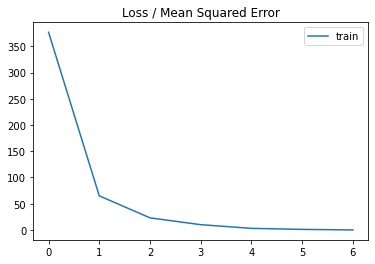

In [184]:
# قسمت اول : تست 20 درصد و ترین 80 درصد

from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

images_gray, image_labels, class_count = LoadData(dpath='English Alphabet')
images_bipolar = to_bipolar(images_gray)

# Split Data
x_train, y_train, m_train, x_test, y_test, m_test = split(images_bipolar, image_labels, testsize=0.20)

# OneHot Encoding
ohe = OneHotEncoder()
y_train_onehot = ohe.fit_transform(np.asmatrix(y_train).T).toarray()
y_train_onehot = np.where(y_train_onehot > 0, 1, -1)
y_test_onehot = ohe.fit_transform(np.asmatrix(y_test).T).toarray()
y_test_onehot = np.where(y_test_onehot > 0, 1, -1)

# initialize perceptron
obj_perceptron = perceptron(eta=1, epoch=7)

# training perceptron
model = obj_perceptron.training(x_train, y_train_onehot);

# predicting
y_pred_onehot_train = model.predict(x_train)
y_pred_onehot = model.predict(x_test)

print(y_test_onehot[0])
print(y_pred_onehot[0])
print('y_test:', np.argmax(y_test_onehot, axis=1))
print('y_pred:', np.argmax(y_pred_onehot, axis=1))

train_mse = model.errors_
train_acc = accuracy_score(np.argmax(y_pred_onehot_train, axis=1), np.argmax(y_train_onehot, axis=1))
test_acc = accuracy_score(np.argmax(y_pred_onehot, axis=1), np.argmax(y_test_onehot, axis=1))

# Report Results
print('Train mse :', train_mse)
print('Train acc :', train_acc)
print('Test  acc :', test_acc)


# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(train_mse, label='train')
pyplot.legend()
pyplot.show()
# plot accuracy during training
# pyplot.subplot(212)
# pyplot.title('Accuracy')
# pyplot.plot(history.history['accuracy'], label='train')
# pyplot.legend()
# pyplot.show()

520 Images Loaded From 26 Classes
520 Images Converted To Bipolar
test_index= [0]
test_index= [1]
test_index= [2]
test_index= [3]
test_index= [4]
test_index= [5]
test_index= [6]
test_index= [7]
test_index= [8]
test_index= [9]
All Train mse : [[318, 102, 67, 43, 31, 28, 16], [294, 111, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16], [294, 112, 61, 47, 28, 32, 16]]
All Train acc : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
All Test  acc : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average Train mse : [296.4 110.9  61.6  46.6  28.3  31.6  16. ]
Average Train acc : 1.0
Average Test  acc : 1.0


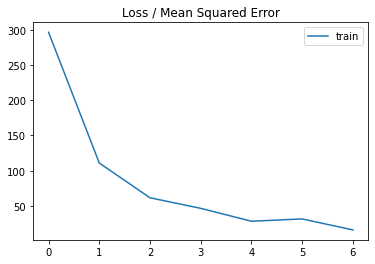

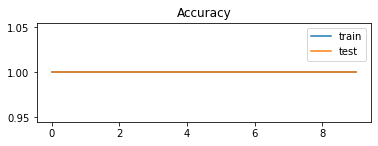

In [13]:
# قسمت دوم : LOOCV

from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

images_gray, image_labels, class_count = LoadData(dpath='English Alphabet')
images_bipolar = to_bipolar(images_gray)

total_train_mse = []
total_train_acc = []
total_test_acc = []

loo = LeaveOneOut()

i = 0

for train_index, test_index in loo.split(images_bipolar):
    
    # OneHot Encoding
    ohe = OneHotEncoder()
    image_labels_onehot = ohe.fit_transform(np.asmatrix(image_labels).T).toarray()
    image_labels_onehot = np.where(image_labels_onehot > 0, 1, -1)
    
    # Split Data
    x_train, x_test = images_bipolar[train_index], images_bipolar[test_index]
    y_train_onehot, y_test_onehot = image_labels_onehot[train_index], image_labels_onehot[test_index]
    
    #print(' ')
    print('test_index=', test_index)
    #print('y_train_onehot=', y_train_onehot)    
    #print('y_test_onehot=', y_test_onehot)

    # initialize perceptron
    obj_perceptron = perceptron(eta=1, epoch=7)

    # training perceptron
    model = obj_perceptron.training(x_train, y_train_onehot);

    # predicting
    y_pred_onehot_train = model.predict(x_train)
    y_pred_onehot = model.predict(x_test)
    
    # Results
    train_mse = model.errors_
    train_acc = accuracy_score(np.argmax(y_pred_onehot_train, axis=1), np.argmax(y_train_onehot, axis=1))
    test_acc = accuracy_score(np.argmax(y_pred_onehot, axis=1), np.argmax(y_test_onehot, axis=1))
    
    total_train_mse.append(train_mse)
    total_train_acc.append(test_acc)
    total_test_acc.append(test_acc)
    
    #print('y_test_onehot[test_index]=', y_test_onehot)
    #print('y_pred_onehot[test_index]=', y_pred_onehot)
    #print(' ')
    
    if i==9:
        break    
    i += 1


# Report Results
print('All Train mse :', total_train_mse)
print('All Train acc :', total_train_acc )
print('All Test  acc :', total_test_acc )
print('Average Train mse :', np.mean(total_train_mse, axis=0) )
print('Average Train acc :', np.mean(total_train_acc) )
print('Average Test  acc :', np.mean(total_test_acc) )

# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(np.mean(total_train_mse, axis=0), label='train')
pyplot.legend()
pyplot.show()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(total_train_acc, label='train')
pyplot.plot(total_test_acc, label='test')
pyplot.legend()
pyplot.show()

520 Images Loaded From 26 Classes
520 Images Converted To Bipolar
Added 15.0 % salt Noise To Images
520 Images Converted To Bipolar
[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
y_test: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18  1  1  1  1  1  1  1  1  1  

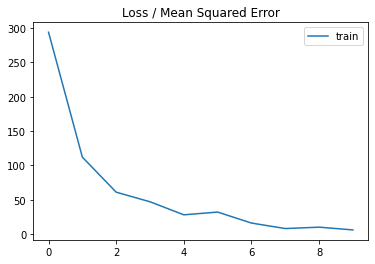

In [35]:
# قسمت سوم : تصاوير با 15 درصد نويز

from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

images_gray, image_labels, class_count = LoadData(dpath='English Alphabet')
images_bipolar = to_bipolar(images_gray)

# Add Noise To Images
noisy_images = to_noisy_images(images=images_gray, noisePercent=0.15, noiseType='salt')
img = Image.fromarray(noisy_images[0].reshape(60,60))
img.save('img_noisy_15percent.png', 'png')
img.show()
noisy_images = to_bipolar(noisy_images)

# Split Data
x_train, x_test = images_bipolar, noisy_images
y_train, y_test = image_labels, image_labels

# OneHot Encoding
ohe = OneHotEncoder()
y_train_onehot = ohe.fit_transform(np.asmatrix(y_train).T).toarray()
y_train_onehot = np.where(y_train_onehot > 0, 1, -1)
y_test_onehot = ohe.fit_transform(np.asmatrix(y_test).T).toarray()
y_test_onehot = np.where(y_test_onehot > 0, 1, -1)

# initialize perceptron
obj_perceptron = perceptron(eta=1, epoch=10)

# training perceptron
model = obj_perceptron.training(x_train, y_train_onehot);

# predicting
y_pred_onehot_train = model.predict(x_train)
y_pred_onehot = model.predict(x_test)

print(y_test_onehot[0])
print(y_pred_onehot[0])
print('y_test:', np.argmax(y_test_onehot, axis=1))
print('y_pred:', np.argmax(y_pred_onehot, axis=1))

train_mse = model.errors_
train_acc = accuracy_score(np.argmax(y_pred_onehot_train, axis=1), np.argmax(y_train_onehot, axis=1))
test_acc = accuracy_score(np.argmax(y_pred_onehot, axis=1), np.argmax(y_test_onehot, axis=1))

# Report Results
print('Train mse :', train_mse)
print('Train acc :', train_acc)
print('Test  acc :', test_acc)


# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(train_mse, label='train')
pyplot.legend()
pyplot.show()
# plot accuracy during training
# pyplot.subplot(212)
# pyplot.title('Accuracy')
# pyplot.plot(history.history['accuracy'], label='train')
# pyplot.legend()
# pyplot.show()

520 Images Loaded From 26 Classes
520 Images Converted To Bipolar
Added 25.0 % salt Noise To Images
520 Images Converted To Bipolar
[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]
y_test: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18  1  1  1  1  1  1  1  1  1  

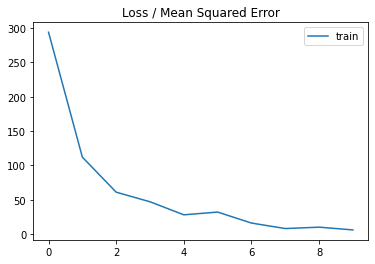

In [36]:
# قسمت سوم : تصاوير با 25 درصد نويز

from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

images_gray, image_labels, class_count = LoadData(dpath='English Alphabet')
images_bipolar = to_bipolar(images_gray)

# Add Noise To Images
noisy_images = to_noisy_images(images=images_gray, noisePercent=0.25, noiseType='salt')
img = Image.fromarray(noisy_images[0].reshape(60,60))
img.save('img_noisy_25percent.png')
img.show()
noisy_images = to_bipolar(noisy_images)

# Split Data
x_train, x_test = images_bipolar, noisy_images
y_train, y_test = image_labels, image_labels

# OneHot Encoding
ohe = OneHotEncoder()
y_train_onehot = ohe.fit_transform(np.asmatrix(y_train).T).toarray()
y_train_onehot = np.where(y_train_onehot > 0, 1, -1)
y_test_onehot = ohe.fit_transform(np.asmatrix(y_test).T).toarray()
y_test_onehot = np.where(y_test_onehot > 0, 1, -1)

# initialize perceptron
obj_perceptron = perceptron(eta=1, epoch=10)

# training perceptron
model = obj_perceptron.training(x_train, y_train_onehot);

# predicting
y_pred_onehot_train = model.predict(x_train)
y_pred_onehot = model.predict(x_test)

print(y_test_onehot[0])
print(y_pred_onehot[0])
print('y_test:', np.argmax(y_test_onehot, axis=1))
print('y_pred:', np.argmax(y_pred_onehot, axis=1))

train_mse = model.errors_
train_acc = accuracy_score(np.argmax(y_pred_onehot_train, axis=1), np.argmax(y_train_onehot, axis=1))
test_acc = accuracy_score(np.argmax(y_pred_onehot, axis=1), np.argmax(y_test_onehot, axis=1))

# Report Results
print('Train mse :', train_mse)
print('Train acc :', train_acc)
print('Test  acc :', test_acc)


# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(train_mse, label='train')
pyplot.legend()
pyplot.show()
# plot accuracy during training
# pyplot.subplot(212)
# pyplot.title('Accuracy')
# pyplot.plot(history.history['accuracy'], label='train')
# pyplot.legend()
# pyplot.show()